# PROYECTO MACHINE LEARNING PARA LA PREDICCIÓN DE TIPOS DE MATERIALES

## JUAN PABLO INSUASTY MURILLO 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura y almacenamiento del dataset

In [80]:
df = pd.read_excel("Datos_Materiales.xlsx")
df.head()

,Familia,Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo Último [MPa],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K]
0,Polimeros,1180.0,3.00,116.0,145.0,2.63,433.00
1,Metales,7870.0,186.00,420.0,126.0,130.00,1093.15
2,Compuestos,1670.0,4.95,46.0,1198.0,32.00,453.15
3,Cerámicos,2430.0,451.00,600.0,1110.0,2.80,2508.15
4,Metales,7845.0,200.00,525.0,155.0,134.00,1268.15


### Conversión de datos tipo String a Númerico

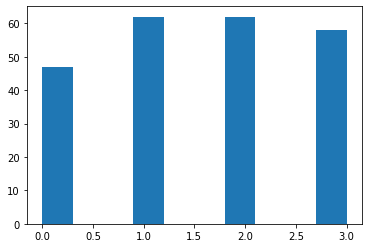

In [81]:
df["Familia"] = [0 if i=="Polimeros" else 1 if i == "Metales" else 2 if i == "Compuestos" else 3 for i in df["Familia"]]
plt.hist(df["Familia"])
plt.show()

### Separación de variables y salida o resultado

In [82]:
X = df.drop(["Familia"],axis=1)
Y = df["Familia"]
X.head()

,Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo Último [MPa],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K]
0,1180.0,3.00,116.0,145.0,2.63,433.00
1,7870.0,186.00,420.0,126.0,130.00,1093.15
2,1670.0,4.95,46.0,1198.0,32.00,453.15
3,2430.0,451.00,600.0,1110.0,2.80,2508.15
4,7845.0,200.00,525.0,155.0,134.00,1268.15


### Separación de datos de test y train 

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

### Regresión lineal y coeficiente R2

In [84]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train,y_train)
LR.score(x_test,y_test) ## R2

0.4035254818867283

### Intercepto del modelo

In [85]:
print(LR.intercept_)

0.7385639501955702


### Coeficientes de la regresión según su variable

In [86]:
list(zip(X.columns.values.tolist(),LR.coef_))

[('Densidad [kg/m^3]', -1.564015166074241e-05),
 ('Modulo de Young [GPa]', -3.938691623157811e-05),
 ('Esfuerzo Último [MPa]', 6.379768913536988e-05),
 ('Dureza [Vickers]', 0.000468138844720972),
 ('Tenacidad a la fractura [MPa m^1/2]', -0.0031210792409730806),
 ('Temperatura de fusión [K]', 0.00047522840939349367)]

### Predicciones 

In [87]:
y_pred = LR.predict(np.array([[14800,420,344,2150,3,3058.15]]))
y_pred

array([2.96294864])

In [88]:
y_pred = LR.predict(np.array([[17150,360,800,300,17.5,3400]]))
y_pred 

array([2.20879357])

In [89]:
y_pred = LR.predict(np.array([[7990,187,558,185,195,1671.15]]))
y_pred 

array([0.91400609])

In [90]:
y_pred = LR.predict(np.array([[1170,2.4,45,3,3.12,573]]))
y_pred 

array([0.98701387])

In [91]:
y_pred = LR.predict(np.array([[8390,110,360,578,65,480.85]]))
y_pred 

array([0.92220537])

### Variables más significativas para la regresión

In [92]:
from sklearn.feature_selection import RFE
NV_list = np.arange(1,7)
NV = 0
score_list = []
score = 0
high_score = 0

for i in range(len(NV_list)):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select = NV_list[i])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if score > high_score:
        high_score = score
        NV = NV_list[i]
        
print("Numero de variables optimo: {0}".format(NV))
print("R2 con {0} variables es: {1}".format(NV,high_score))

Numero de variables optimo: 5
R2 con 5 variables es: 0.4061870674241751


### Lista del modelo entrenado con n numero de variables y el R2 de cada uno

In [93]:
print(list(zip(NV_list,score_list)))

[(1, 0.05690638751820676), (2, 0.28021295658757694), (3, 0.40355593972881865), (4, 0.40574715340394885), (5, 0.4061870674241751), (6, 0.4035254818867283)]


### Modelo entrenado con el numero de variables optimo

In [94]:
model = LinearRegression()
rfe = RFE(model,n_features_to_select = 5)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
x_train_rfe = rfe.fit_transform(x_train,y_train)

LR = model.fit(x_train_rfe,y_train)

### Función para saber, que variables funcionan mejor para el modelo y cuales no

In [95]:
rfe.support_

array([False,  True,  True,  True,  True,  True])

In [96]:
cols = list(X.columns)
temp = pd.Series(rfe.support_,index=cols)
temp

Densidad [kg/m^3]                      False
Modulo de Young [GPa]                   True
Esfuerzo Último [MPa]                   True
Dureza [Vickers]                        True
Tenacidad a la fractura [MPa m^1/2]     True
Temperatura de fusión [K]               True
dtype: bool

### Variables seleccionadas

In [97]:
V_select = temp[temp==True]
print(V_select)

Modulo de Young [GPa]                  True
Esfuerzo Último [MPa]                  True
Dureza [Vickers]                       True
Tenacidad a la fractura [MPa m^1/2]    True
Temperatura de fusión [K]              True
dtype: bool


### Intercepto del modelo

In [98]:
print(LR.intercept_)

0.725254867542164


### Coeficientes de la regresión según su variable

In [99]:
list(zip(V_select.index,LR.coef_))

[('Modulo de Young [GPa]', -0.000232123205263309),
 ('Esfuerzo Último [MPa]', 4.44174630305766e-05),
 ('Dureza [Vickers]', 0.0004878456559512689),
 ('Tenacidad a la fractura [MPa m^1/2]', -0.0033398829631305564),
 ('Temperatura de fusión [K]', 0.0004565885280969861)]

### Predicciones

In [100]:
y_pred = LR.predict(np.array([[420,344,2150,3,3058.15]]))
y_pred

array([3.07820745])

In [101]:
y_pred = LR.predict(np.array([[360,800,300,17.5,3400]]))
y_pred 

array([2.31753122])

In [102]:
y_pred = LR.predict(np.array([[187,558,185,195,1671.15]]))
y_pred 

array([0.90863496])

In [103]:
y_pred = LR.predict(np.array([[2.4,45,3,3.12,573]]))
y_pred 

array([0.97936489])

In [104]:
y_pred = LR.predict(np.array([[110,360,578,65,480.85]]))
y_pred 

array([1.00014459])

# Regresión Logística

### Entrenamiento

In [105]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
logi = LogisticRegression(solver = "liblinear").fit(x_train,y_train)

### Calculo de R2 

In [106]:
logi.score(x_test,y_test)

0.8793103448275862

### Coeficientes del modelo

In [107]:
logi.coef_[0]

array([ 2.58924159e-03, -2.35968156e-01,  2.07270088e-03, -1.41760116e-03,
       -3.43489133e-01, -5.78248562e-05])

In [108]:
list(zip(X.columns.values.tolist(),logi.coef_[0].tolist()))

[('Densidad [kg/m^3]', 0.0025892415870007123),
 ('Modulo de Young [GPa]', -0.23596815587321834),
 ('Esfuerzo Último [MPa]', 0.0020727008805290223),
 ('Dureza [Vickers]', -0.0014176011648696358),
 ('Tenacidad a la fractura [MPa m^1/2]', -0.34348913307293827),
 ('Temperatura de fusión [K]', -5.7824856231545586e-05)]

### Predicciones

In [109]:
y_pred = logi.predict(np.array([[14800,420,344,2150,3,3058.15]]))
y_pred

array([3], dtype=int64)

In [110]:
y_pred = logi.predict(np.array([[17150,360,800,300,17.5,3400]]))
y_pred 

array([1], dtype=int64)

In [111]:
y_pred = logi.predict(np.array([[7990,187,558,185,195,1671.15]]))
y_pred 

array([1], dtype=int64)

In [112]:
y_pred = logi.predict(np.array([[1170,2.4,45,3,3.12,573]]))
y_pred 

array([0], dtype=int64)

In [113]:
y_pred = logi.predict(np.array([[8390,110,360,578,65,480.85]]))
y_pred 

array([1], dtype=int64)

### Variables Optimas

In [114]:
from sklearn.feature_selection import RFE
NV_list = np.arange(1,7)
NV = 0
score_list = []
score = 0
high_score = 0

for i in range(len(NV_list)):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
    model = LogisticRegression(solver = "liblinear")
    rfe = RFE(model, n_features_to_select = NV_list[i])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if score > high_score:
        high_score = score
        NV = NV_list[i]
        
print("Numero de variables optimo: {0}".format(NV))
print("R2 con {0} variables es: {1}".format(NV,high_score))

Numero de variables optimo: 6
R2 con 6 variables es: 0.8793103448275862


### Lista de R2 del modelo entrenado con n numero de variables

In [115]:
print(list(zip(NV_list,score_list)))

[(1, 0.5689655172413793), (2, 0.8275862068965517), (3, 0.7931034482758621), (4, 0.8275862068965517), (5, 0.8448275862068966), (6, 0.8793103448275862)]


### Modelo entrenado con el numero de variables optimo

In [116]:
model = LogisticRegression(solver = "liblinear")
rfe = RFE(model,n_features_to_select = 6)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
x_train_rfe = rfe.fit_transform(x_train,y_train)

LR = model.fit(x_train_rfe,y_train)

In [117]:
rfe.support_

array([ True,  True,  True,  True,  True,  True])

In [118]:
cols = list(X.columns)
temp = pd.Series(rfe.support_,index=cols)
temp

Densidad [kg/m^3]                      True
Modulo de Young [GPa]                  True
Esfuerzo Último [MPa]                  True
Dureza [Vickers]                       True
Tenacidad a la fractura [MPa m^1/2]    True
Temperatura de fusión [K]              True
dtype: bool

In [119]:
V_select = temp[temp==True]
print(V_select)

Densidad [kg/m^3]                      True
Modulo de Young [GPa]                  True
Esfuerzo Último [MPa]                  True
Dureza [Vickers]                       True
Tenacidad a la fractura [MPa m^1/2]    True
Temperatura de fusión [K]              True
dtype: bool


### Lista de coeficientes por cada variable

In [120]:
list(zip(V_select.index,logi.coef_[0]))

[('Densidad [kg/m^3]', 0.0025892415870007123),
 ('Modulo de Young [GPa]', -0.23596815587321834),
 ('Esfuerzo Último [MPa]', 0.0020727008805290223),
 ('Dureza [Vickers]', -0.0014176011648696358),
 ('Tenacidad a la fractura [MPa m^1/2]', -0.34348913307293827),
 ('Temperatura de fusión [K]', -5.7824856231545586e-05)]

# Validación Cruzada

In [121]:
from sklearn.model_selection import cross_val_score

Puntaje = cross_val_score(LogisticRegression(solver="liblinear"),X,Y,scoring="accuracy",cv=10)
Puntaje

array([0.86956522, 0.73913043, 0.7826087 , 0.73913043, 0.82608696,
       0.7826087 , 0.82608696, 0.82608696, 0.73913043, 0.77272727])

# Matríz de Confusión

In [122]:
from sklearn.metrics import confusion_matrix
y_true = y_test
x_test_rfe = rfe.transform(x_test)
y_pred = logi.predict(x_test_rfe)
confusion_matrix(y_true,y_pred)

array([[11,  0,  0,  0],
       [ 0, 16,  0,  0],
       [ 1,  4,  9,  2],
       [ 0,  0,  0, 15]], dtype=int64)

# Árbol de decisión

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
cfl_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state=0).fit(x_train,y_train)

In [124]:
y_pred = cfl_tree.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8275862068965517

In [125]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  1,  0],
       [ 0, 12,  4,  0],
       [ 0,  0, 14,  2],
       [ 0,  3,  0, 12]], dtype=int64)

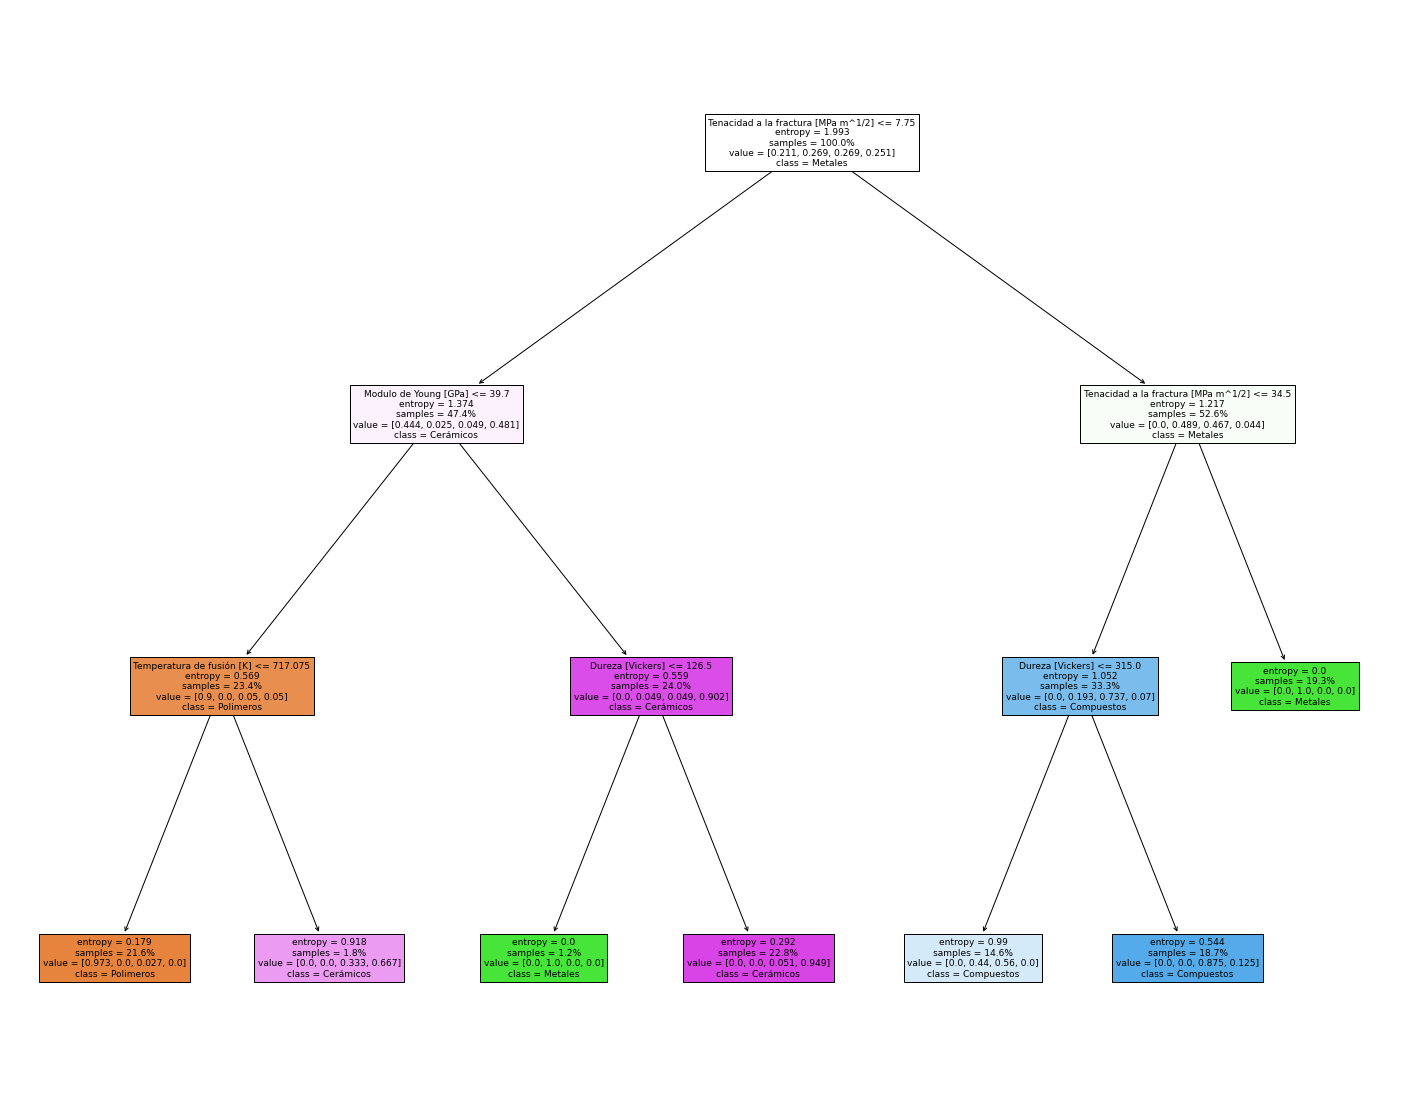

In [126]:
from sklearn import tree
cfl_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state=0)
model = cfl_tree.fit(x_train,y_train)

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(cfl_tree,
                feature_names = X.columns,
                class_names = ["Polimeros","Metales","Compuestos","Cerámicos"],
                filled = True,
                proportion = True)

### Predicciones

In [131]:
y_pred = cfl_tree.predict(np.array([[14800,420,344,2150,3,3058.15]]))
y_pred

array([3], dtype=int64)

In [132]:
y_pred = cfl_tree.predict(np.array([[17150,360,800,300,17.5,3400]]))
y_pred 

array([2], dtype=int64)

In [133]:
y_pred = cfl_tree.predict(np.array([[7990,187,558,185,195,1671.15]]))
y_pred 

array([1], dtype=int64)

In [134]:
y_pred = cfl_tree.predict(np.array([[1170,2.4,45,3,3.12,573]]))
y_pred 

array([0], dtype=int64)

In [135]:
y_pred = cfl_tree.predict(np.array([[8390,110,360,578,65,480.85]]))
y_pred 

array([1], dtype=int64)